In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np

In [2]:
#Read the data
cars=pd.read_csv(r"C:\Users\yukthasri\Downloads\Cars.csv")
cars.head()

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


In [3]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [4]:
cars.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [5]:
cars.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


EDA

In [7]:
import warnings
warnings.filterwarnings('ignore')

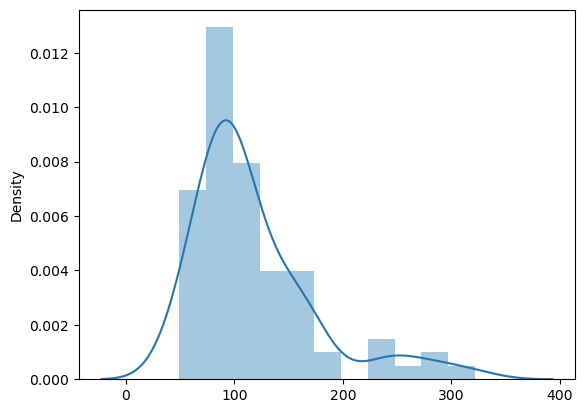

In [8]:
sns.distplot(x=cars['HP'])
plt.show()

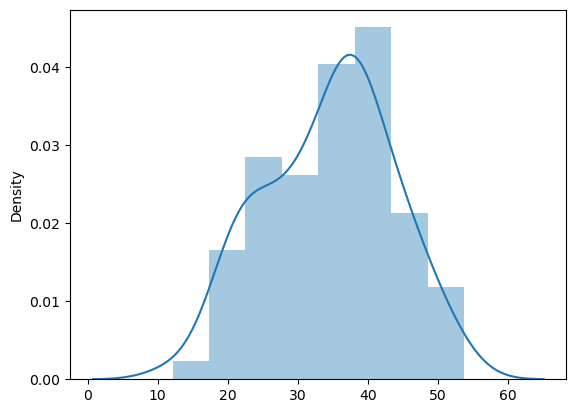

In [9]:
sns.distplot(x=cars['MPG'])
plt.show()

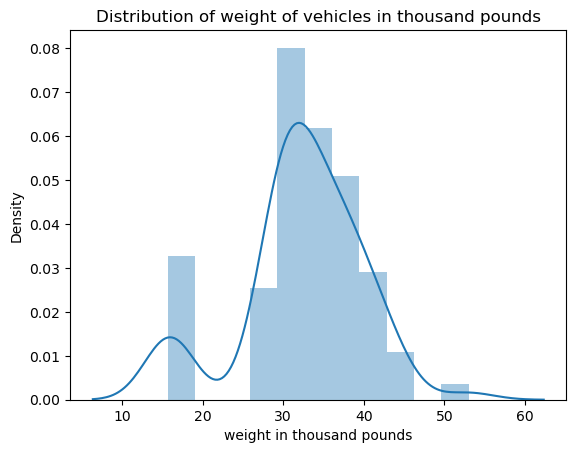

In [10]:
sns.distplot(x=cars['WT'])
plt.title('Distribution of weight of vehicles in thousand pounds')
plt.xlabel('weight in thousand pounds')
plt.show()

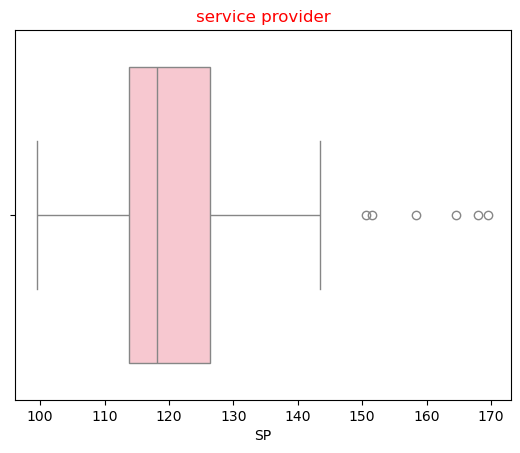

In [11]:
sns.boxplot(x=cars['SP'],color='pink')
plt.title('service provider',color='red')
plt.xlabel('SP')
plt.show()

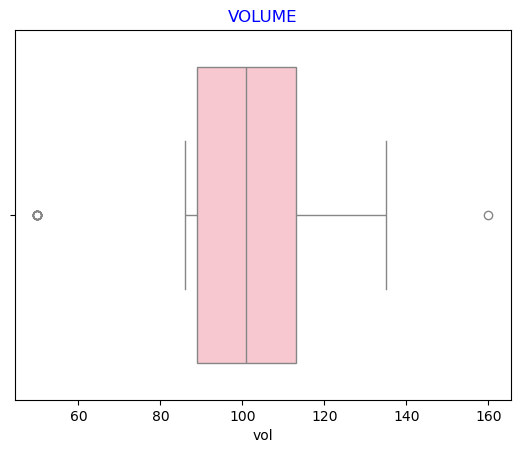

In [12]:
sns.boxplot(x=cars['VOL'],color='pink')
plt.title('VOLUME',color='blue')
plt.xlabel('vol')
plt.show()

<Axes: xlabel='VOL', ylabel='WT'>

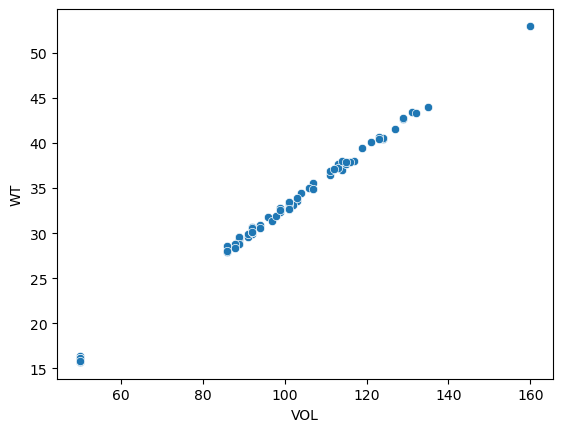

In [13]:
sns.scatterplot(x=cars['VOL'],y=cars['WT'])

<Axes: xlabel='HP', ylabel='WT'>

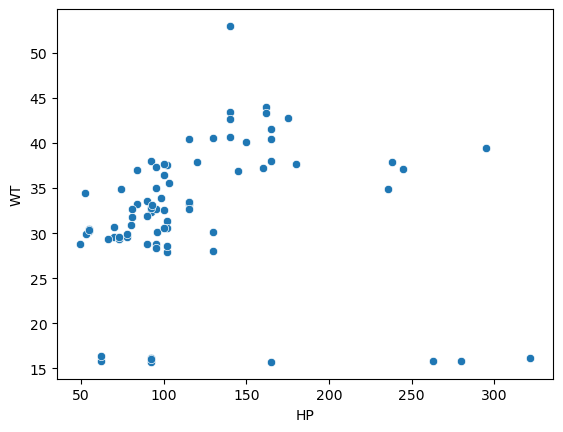

In [14]:
sns.scatterplot(x=cars['HP'],y=cars['WT'])

<Axes: xlabel='MPG', ylabel='WT'>

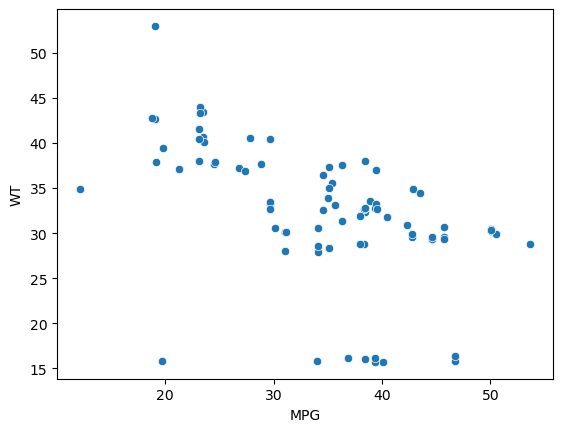

In [15]:

sns.scatterplot(x=cars['MPG'],y=cars['WT'])

<Axes: xlabel='HP', ylabel='VOL'>

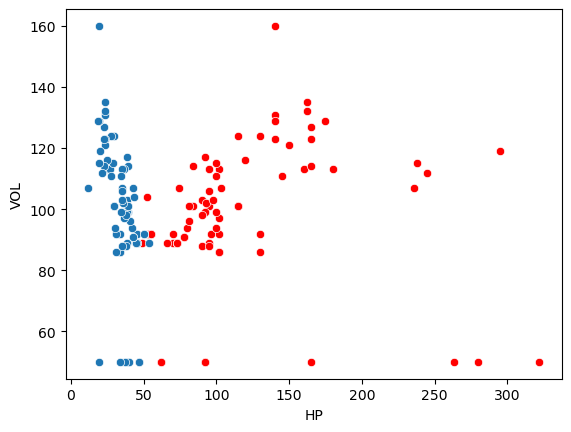

In [16]:
sns.scatterplot(x=cars['HP'],color=['red'],y=cars['VOL'])
sns.scatterplot(x=cars['MPG'],y=cars['VOL'])

<Axes: xlabel='HP', ylabel='VOL'>

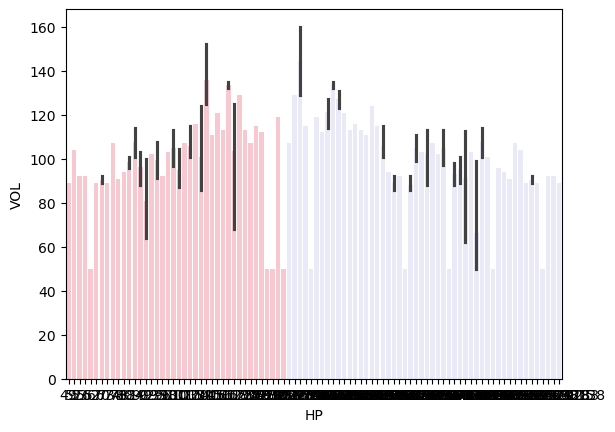

In [17]:
sns.barplot(x=cars['HP'],color='pink',y=cars['VOL'])
sns.barplot(x=cars['MPG'],color='lavender',y=cars['VOL'])

<Axes: xlabel='WT', ylabel='VOL'>

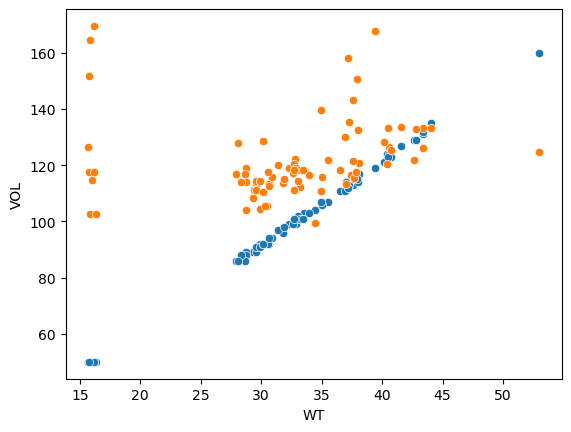

In [18]:
sns.scatterplot(x=cars['WT'],y=cars['VOL'])
sns.scatterplot(x=cars['WT'],y=cars['SP'])

<Axes: xlabel='VOL', ylabel='SP'>

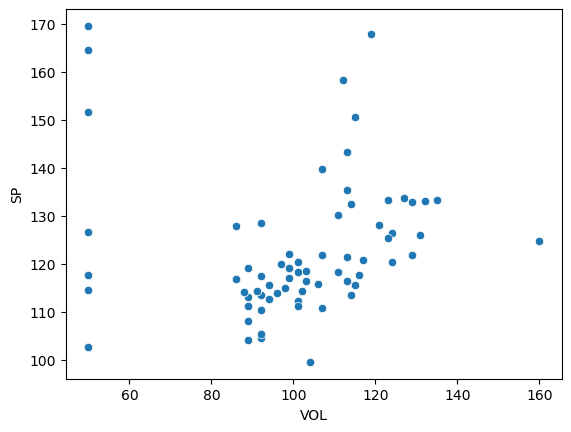

In [20]:
sns.scatterplot(x=cars['VOL'],y=cars['SP'])

<Axes: xlabel='WT', ylabel='SP'>

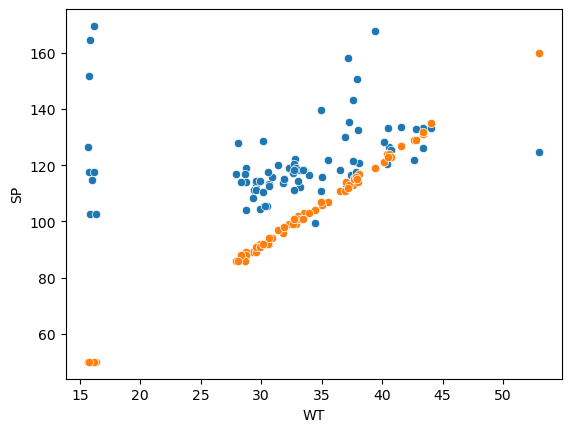

In [26]:
sns.scatterplot(x=cars['WT'],y=cars['SP'])
sns.scatterplot(x=cars['WT'],y=cars['VOL'])

<Axes: xlabel='WT', ylabel='VOL'>

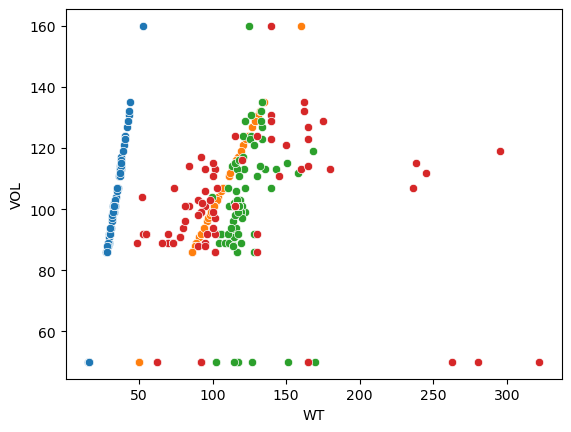

In [29]:
sns.scatterplot(x=cars['WT'],y=cars['VOL'])
sns.scatterplot(x=cars['VOL'],y=cars['VOL'])
sns.scatterplot(x=cars['SP'],y=cars['VOL'])
sns.scatterplot(x=cars['HP'],y=cars['VOL'])

In [49]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
cars[['HP','WT','VOL','SP']]=sc.fit_transform(cars[['HP','WT','VOL','SP']])

In [57]:
np.round(cars.describe(),3)

,HP,MPG,VOL,SP,WT
count,81.000,81.000,81.000,81.000,81.000
mean,-0.000,34.422,0.000,0.000,0.000
std,1.006,9.131,1.006,1.006,1.006
min,-1.206,12.101,-2.200,-1.559,-2.243
25%,-0.590,27.856,-0.441,-0.547,-0.379
50%,-0.308,35.153,0.101,-0.236,0.043
75%,0.397,39.532,0.642,0.345,0.669
max,3.603,53.701,2.763,3.410,2.764


simple linerar regression models

In [59]:
ml_v=smf.ols('MPG~VOL',data=cars).fit()
ml_v.rsquared

0.2799008651122705

In [61]:
ml_v.params

Intercept    34.422076
VOL          -4.801137
dtype: float64

In [63]:
ml_w=smf.ols('MPG~WT',data=cars).fit()
np.round(ml_w.rsquared,2)

0.28

In [65]:
ml_w.params

Intercept    34.422076
WT           -4.780288
dtype: float64

In [71]:
ml_H=smf.ols('MPG~HP',data=cars).fit()
np.round(ml_H.rsquared,2)

0.53

In [73]:
ml_H.params

Intercept    34.422076
HP           -6.579653
dtype: float64

In [75]:
ml_S=smf.ols('MPG~SP',data=cars).fit()
np.round(ml_S.rsquared,2)

0.47

In [77]:
ml_S.params

Intercept    34.422076
SP           -6.235589
dtype: float64

In [95]:
model=smf.ols('MPG~WT+VOL+SP+HP',data=cars).fit()
np.round(model.rsquared,2)

0.77

In [97]:
model.params

Intercept    34.422076
WT            2.982842
VOL          -7.448031
SP            5.575816
HP          -11.660955
dtype: float64

In [91]:
ml_v.params


Intercept    34.422076
HP           -6.579653
dtype: float64

In [93]:
MPG= (2.982)*WT + (0.8868)*VOL + B3*SP + (-1.348243)*HP +0.8988

NameError: name 'B1' is not defined